In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 9.1 MB/s eta 0:00:00


In [ ]:
!pip install autocorrect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 20.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622380 sha256=bffd4fdb3cef101973aa6aed5af37e3463d7bcfc88c6a5de7cc9077dc392aeaa
  Stored in directory: /root/.cache/pip/wheels/b5/7b/6d/b76b29ce11ff8e2521c8c7dd0e5bfee4fb1789d76193124343
Successfully built autocorrect


In [ ]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993243 sha256=395d775789cf12675e97f9d558198d9c33f9a9c1102bcf96ec65c4d5ff1e11bc
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from io import StringIO
from transformers import pipeline
from torch.utils.data import DFIterDataPipe
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import chardet
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tag import pos_tag
import re
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
with open('Depression_Dataset.csv', 'rb') as f:
    result = chardet.detect(f.read())

df = pd.read_csv('Depression_Dataset.csv', encoding=result['encoding'], header=None, names=['KagglePredictions', 'Account', 'Date', 'Flag', 'Username', "Tweet"])

print(df.head())

   KagglePredictions     Account                          Date      Flag  \
0                  0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1                  0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2                  0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3                  0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4                  0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

          Username                                              Tweet  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  


In [ ]:
import random
import pandas as pd

# Split the DataFrame into positive and negative DataFrames
positive_tweets = df[df['KagglePredictions'] == 4]
negative_tweets = df[df['KagglePredictions'] == 0]

# Filter out tweets that are too short or too long
positive_tweets = positive_tweets[(positive_tweets['Tweet'].str.len() > 20) & (positive_tweets['Tweet'].str.len() < 512)]
negative_tweets = negative_tweets[(negative_tweets['Tweet'].str.len() > 20) & (negative_tweets['Tweet'].str.len() < 512)]

# Randomly select 2000 positive and negative tweets each
random_positive_tweets = positive_tweets.sample(n=2000)
random_negative_tweets = negative_tweets.sample(n=2000)

# Combine the randomly selected positive and negative tweets into a single DataFrame
random_tweets = pd.concat([random_positive_tweets, random_negative_tweets])

# Shuffle the rows of the combined DataFrame
random_tweets = random_tweets.sample(frac=1)

# Create a new DataFrame with the random tweets
random_df = pd.DataFrame(random_tweets)

# Save the new DataFrame to a CSV file
random_df.to_csv("sample_tweets.csv", index=False)


In [ ]:
dfSample = pd.read_csv('sample_tweets.csv')
dfSample.head()

,KagglePredictions,Account,Date,Flag,Username,Tweet
0,4,1677720031,Sat May 02 03:36:57 PDT 2009,NO_QUERY,heisterkamp,Who really doubted that Mathematica is the hea...
1,0,2070616243,Sun Jun 07 18:00:40 PDT 2009,NO_QUERY,AnDreaAmaZzzing,Break time at work without Emily she sooo wen...
2,4,1955871755,Thu May 28 20:46:11 PDT 2009,NO_QUERY,Jorpa59,@blsm79 get with me before you go to bed tonig...
3,0,2011608823,Tue Jun 02 19:17:11 PDT 2009,NO_QUERY,dbmost,@danigingerkid he was not happy and i wanted t...
4,4,1982167695,Sun May 31 10:39:52 PDT 2009,NO_QUERY,PaulDale67,@marcelbooth ahh good news mate. BBQ is lit he...


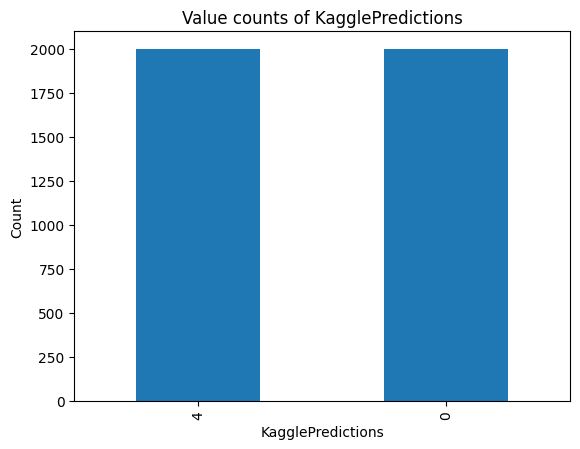

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Get the value counts of the KagglePredictions column
value_counts = dfSample['KagglePredictions'].value_counts()

# Create a bar chart of the value counts
value_counts.plot.bar()

# Set the title and axis labels
plt.title("Value counts of KagglePredictions")
plt.xlabel("KagglePredictions")
plt.ylabel("Count")

# Show the chart
plt.show()

In [ ]:
# Defining dictionary containing all emojis with their meanings.
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ';p':'wink', ':-E': 'vampire', ':(': 'sad face', ':-(': 'sad',
':-<': 'sad', ':P': 'face with tounge out', ':O': 'surprised',':-@': 'shocked', ':@': 'shocked',':-$': 'confused',
':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy','@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
":'-)": 'sadsmile', ';)': 'wink', ';-)': 'wink', 'O:-)': 'angel','-B':'smile', ';)':'wink',':-)': 'smile',
':D': 'grinning face',':(': 'sad',':-(': 'frown',':/': 'confused','<3': 'heart',':O': 'surprised',':-O': 'shocked',
':|': 'neutral face',':$': 'blush',':@': 'angry',':S': 'confused',':-S': 'worried',':Z': 'sleeping',
':-P': 'sticking out tongue',':-B': 'nerd',';-)': 'winking with a grin',':-X': 'sealed lips',':-D': 'laughing',
';(': 'crying',';-(': 'crying with a frown',':>': 'smug',':^)': 'smiling with a nose',':-&': 'tongue-tied',':-#': 'muted',
':(': 'sick',':))': 'really happy','8-)': 'nerd with glasses','>:/': 'annoyed','(:)': 'hug',':-||': 'angry face',
':-))': 'very happy',':-P': 'sticking out tongue',':-o': 'surprised',':-@': 'shocked','&-(': 'sad',':-):)': 'double happy',
':-': 'kiss',':-<': 'very sad',':o)': 'smiling face with halo',':-q': 'smoking',':p': 'sticking out tongue', '=P':'smile with tongue'}

In [ ]:
abbreviations = {"$" : " dollar ", "€" : " euro ", "4ao" : "for adults only", "a.m" : "morning", "a3" : "anytime anywhere anyplace",
"aamof" : "as a matter of fact","acct" : "account","adih" : "another day in hell","afaic" : "as far as i am concerned",
"afaict" : "as far as i can tell","afaik" : "as far as i know","afair" : "as far as i remember","afk" : "away from keyboard",
"app" : "application","approx" : "approximately","apps" : "applications","asap" : "as soon as possible","asl" : "age, sex, location",
"atk" : "at the keyboard","ave." : "avenue","aymm" : "are you my mother","ayor" : "at your own risk", "bb" : "baby",
"b+b" : "bed and breakfast","b.c" : "before christ","b2b" : "business to business","b2c" : "business to customer",
"b4" : "before","b4n" : "bye for now","b@u" : "back at you","bae" : "before anyone else","bak" : "back at keyboard",
"bbbg" : "bye bye be good","bbc" : "british broadcasting corporation","bbias" : "be back in a second","bbl" : "be back later",
"bbs" : "be back soon","be4" : "before","bfn" : "bye for now","blvd" : "boulevard","bout" : "about","brb" : "be right back",
"bros" : "brothers","bro" : "brother", "brt" : "be right there","bsaaw" : "big smile and a wink","btw" : "by the way","bwl" : "bursting with laughter",
"co" : "care of","cet" : "central european time","cf" : "compare","cia" : "central intelligence agency","csl" : "can not stop laughing",
"cu" : "see you","cul8r" : "see you later","cv" : "curriculum vitae","cwot" : "complete waste of time","cya" : "see you",
"cyt" : "see you tomorrow","dae" : "does anyone else","dbmib" : "do not bother me i am busy","diy" : "do it yourself",
"dm" : "direct message","dwh" : "during work hours","e123" : "easy as one two three","eet" : "eastern european time","eg" : "example",
"embm" : "early morning business meeting","encl" : "enclosed",    "encl" : "enclosed","etc" : "and so on","faq" : "frequently asked questions",
"fawc" : "for anyone who cares","fb" : "facebook","fc" : "fingers crossed","fig" : "figure","fimh" : "forever in my heart",
"ft" : "featuring","ftl" : "for the loss","ftw" : "for the win","fwiw" : "for what it is worth","fyi" : "for your information",
"g9" : "genius","gahoy" : "get a hold of yourself","gal" : "get a life","gcse" : "general certificate of secondary education",
"gfn" : "gone for now","gg" : "good game","gl" : "good luck","glhf" : "good luck have fun","gmt" : "greenwich mean time","gmta" : "great minds think alike",
"gn" : "good night","gm":"good morning","g.o.a.t" : "greatest of all time","goat" : "greatest of all time","goi" : "get over it","gps" : "global positioning system",
"gr8" : "great","gratz" : "congratulations","gyal" : "girl","h&c" : "hot and cold","hp" : "horsepower","hr" : "hour","hrh" : "his royal highness",
"ht" : "height","ibrb" : "i will be right back","ic" : "i see","icq" : "i seek you","icymi" : "in case you missed it","idc" : "i do not care",
"idgadf" : "i do not give a damn fuck","idgaf" : "i do not give a fuck","idk" : "i do not know",    "ie" : "that is","i.e" : "that is","ifyp" : "i feel your pain",
"iirc" : "if i remember correctly","ilu" : "i love you","ily" : "i love you","imho" : "in my humble opinion","imo" : "in my opinion","imu" : "i miss you","imy":"i miss you",
"iow" : "in other words","irl" : "in real life","j4f" : "just for fun","jic" : "just in case","jk" : "just kidding","jsyk" : "just so you know","l8r" : "later",
"lb" : "pound","lbs" : "pounds","ldr" : "long distance relationship","lmao" : "laugh my ass off","lmfao" : "laugh my fucking ass off","lol" : "laugh out loud","lolol":"very funny",
"ltd" : "limited","ltns" : "long time no see","m8" : "mate","mf" : "motherfucker","mfs" : "motherfuckers","mfw" : "my face when","mofo" : "motherfucker",
"mph" : "miles per hour","mr" : "mister","mrw" : "my reaction when","ms" : "miss","mte" : "my thoughts exactly","nagi" : "not a good idea",
"nbc" : "national broadcasting company","nbd" : "not big deal","nfs" : "not for sale","ngl" : "not going to lie","nhs" : "national health service",
"nrn" : "no reply necessary","nsfl" : "not safe for life","nsfw" : "not safe for work", "nth" : "nice to have","nvr" : "never","nyc" : "new york city",
"oc" : "original content","og" : "original","ohp" : "overhead projector","oic" : "oh i see","omdb" : "over my dead body","omg" : "oh my god","omw" : "on my way","p . a" : "per annum",
"pm" : "after midday","pm" : "after midday","poc" : "people of color","pov" : "point of view","pp" : "pages","ppl" : "people","prw" : "parents are watching",
"ps" : "postscript","pt" : "point","ptb" : "please text back","pto" : "please turn over","qpsa" : "what happens",     "ratchet" : "rude","rbtl" : "read between the lines",
"rlrt" : "real life retweet", "rofl" : "rolling on the floor laughing","roflol" : "rolling on the floor laughing","rotflmao" : "rolling on the floor laughing my ass off",
"rt" : "retweet","ruok" : "are you ok","sfw" : "safe for work","sk8" : "skate","smh" : "shake my head","sq" : "square","srsly" : "seriously", "ssdd" : "same stuff different day",
"tbh" : "to be honest","tbs" : "tablespoon","tbsp" : "tablespoon","tfw" : "that feeling when","thks" : "thank you","tho" : "though","thx" : "thank you",
"tia" : "thanks in advance","til" : "today i learned",    "tl;dr" : "too long i did not read","tldr" : "too long i did not read","tmb" : "tweet me back",
"tntl" : "trying not to laugh","ttyl" : "talk to you later","u" : "you","u2" : "you too","u4e" : "yours for ever","utc" : "coordinated universal time",
"w" : "with","wo" : "without","w8" : "wait","wassup" : "what is up","wb" : "welcome back","wtf" : "what the fuck","wtg" : "way to go",
"wtpa" : "where the party at","wuf" : "where are you from","wuzup" : "what is up","wywh" : "wish you were here","yd" : "yard","ygtr" : "you got that right",
"ynk" : "you never know","zzz" : "sleeping","hw":"homework", "apt":"apartment", "abt":"about","bruh":"brother", "tyu":"to you", "bcuz":"because", "kaka":"poop",
"lolz":"laugh out loud", "w":"with", "thithi":"funny", "dood":"dude", "msg":"message", "youser":"user", "fml":'fuck my life', "wtf":"What the fuck",
"cal":"calories", "bogo":"buy one get one free","al": "alabama","ak": "alaska","az": "arizona","ar": "arkansas","ca": "california",
"co": "colorado","ct": "connecticut","de": "delaware","fl": "florida","ga": "georgia",
"ia": "iowa","ks": "kansas","ky": "kentucky","la": "louisiana","ma": "massachusetts",
"mi": "michigan","mn": "minnesota","ms": "mississippi","mo": "missouri", "mt": "montana","ne": "nebraska","nv": "nevada","NH": "New Hampshire",
"nj": "new jersey","nm": "new mexico","ny": "new york","nc": "north carolina","nd": "north dakota","oh": "ohio",
"pa": "pennsylvania","ri": "rhode island","sc": "south carolina","sd": "south dakota","tn": "tennessee","tx": "texas","ut": "utah",
"vt": "vermont","va": "virginia","wa": "washington","wv": "west virginia","wi": "wisconsin","wy": "wyoming", "coulor":"color", "xd":"laughing", "freakin":"freaking",
}


In [ ]:
contractions = {"aint": "am not","arent": "are not","cant": "cannot","cantve": "cannot have","'cause": "because",
"couldve": "could have","couldnt": "could not","couldntve": "could not have","didnt": "did not","doesnt": "does not",
"dont": "do not","hadnt": "had not","hadntve": "had not have","hasnt": "has not","havent": "have not","hed": "he would",
"hedve": "he would have","hell": "he will","hellve": "he will have","hes": "he is","howd": "how did","howdy": "how do you",
"howll": "how will","hows": "how is","id": "i would","idve": "i would have","ill": "i will","illve": "i will have",
"im": "i am","ive": "i have","isnt": "is not","itd": "it had","itdve": "it would have","itll": "it will","itllve": "it will have",
"its": "it is","lets": "let us","maam": "madam","maynt": "may not","mightve": "might have","mightnt": "might not",
"mightntve": "might not have","mustve": "must have","mustnt": "must not","mustntve": "must not have","neednt": "need not",
"needntve": "need not have","oclock": "of the clock","oughtnt": "ought not","oughtntve": "ought not have","shant": "shall not",
"shant": "shall not","shantve": "shall not have","shed": "she would","shedve": "she would have","shell": "she will",
"shellve": "she will have","shes": "she is","shouldve": "should have","shouldnt": "should not","shouldntve": "should not have",
"sove": "so have","sos": "so is","thatd": "that would","thatdve": "that would have","thats": "that is","thered": "there had",
"theredve": "there would have","theres": "there is","theyd": "they would","theydve": "they would have","theyll": "they will",
"theyllve": "they will have","theyre": "they are","theyve": "they have","tove": "to have","wasnt": "was not","wed": "we had",
"wedve": "we would have","well": "we will","wellve": "we will have","were": "we are","weve": "we have",
"werent": "were not","whatll": "what will","whatllve": "what will have","whatre": "what are","whats": "what is",
"whatve": "what have","whens": "when is","whenve": "when have","whered": "where did","wheres": "where is",
"whereve": "where have","wholl": "who will","whollve": "who will have","whos": "who is","whove": "who have",
"whys": "why is","whyve": "why have","willve": "will have","wont": "will not","wontve": "will not have",
"wouldve": "would have","wouldnt": "would not","wouldntve": "would not have","yall": "you all","yalls": "you alls",
"yalld": "you all would","yalldve": "you all would have","yallre": "you all are","yallve": "you all have",
"youd": "you had","youdve": "you would have","youll": "you you will","youllve": "you you will have",
"youre": "you are","youve": "you have", "awhile":"a while"}

In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from autocorrect import Speller

nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))
spell = Speller(lang='en')

def preprocess_text(text):
    # Lowercase text
    text = text.lower()

    # Replace @username with 'user'
    text = re.sub(r'@[A-Za-z0-9_]+', 'user', text)

    # Replace URLs with 'link'
    text = re.sub(r'((www\.[^\s]+)|(https?://[^\s]+))', 'link', text)

    # Replace emojis
    for emoji in emojis:
        text = text.replace(emoji, emojis[emoji])

    # Replace ellipsis with '... '
    text = re.sub(r'\.\.\.', '... ', text)

    # Remove punctuation marks except '$', '?', and '!'
    text = re.sub(r'[^\w\s$?!]', '', text)

    # Replace abbreviations and apostrophes
    for word in text.split():
        if word.lower() in contractions:
            text = text.replace(word, contractions[word.lower()])
        elif word.lower() in abbreviations:
            text = text.replace(word, abbreviations[word.lower()])

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove stop words
    tokens_without_stop = [token for token in tokens if not token in stop_words]

    # Correct spelling of tokens
    corrected_tokens = [spell(token) for token in tokens_without_stop]

    # Join tokens back into a single string
    preprocessed_text = " ".join(corrected_tokens)

    return preprocessed_text


dfSample['Preprocessed'] = dfSample['Tweet'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
dfSample.head()

,KagglePredictions,Account,Date,Flag,Username,Tweet,Preprocessed,SentimentLabel,SentimentScore
0,4,1677720031,Sat May 02 03:36:57 PDT 2009,NO_QUERY,heisterkamp,Who really doubted that Mathematica is the hea...,really doubted mathematics heart core wolframa...,NEGATIVE,0.948184
1,0,2070616243,Sun Jun 07 18:00:40 PDT 2009,NO_QUERY,AnDreaAmaZzzing,Break time at work without Emily she sooo wen...,break time work without emily soon went without !,NEGATIVE,0.999271
2,4,1955871755,Thu May 28 20:46:11 PDT 2009,NO_QUERY,Jorpa59,@blsm79 get with me before you go to bed tonig...,user get go bed tonight,NEGATIVE,0.971881
3,0,2011608823,Tue Jun 02 19:17:11 PDT 2009,NO_QUERY,dbmost,@danigingerkid he was not happy and i wanted t...,user happy wanted sunday,NEGATIVE,0.986454
4,4,1982167695,Sun May 31 10:39:52 PDT 2009,NO_QUERY,PaulDale67,@marcelbooth ahh good news mate. BBQ is lit he...,user ah good news mate bb lit nearly ready sta...,POSITIVE,0.923904


In [ ]:
def truncate_text(text, max_length=512):
  return text[:max_length]

def get_sentiment_label(text):
  truncated_text = truncate_text(text)
  result = classifier(truncated_text)
  return result[0]['label']

def get_sentiment_score(text):
  truncated_text = truncate_text(text)
  result = classifier(truncated_text)
  return result[0]['score']

In [ ]:
# replace any NaN or None values in the 'Tweet' column with empty strings
dfSample['Preprocessed'] = dfSample['Preprocessed'].fillna('')

# apply sentiment analysis to the 'Tweet' column and create new columns for the label and score
dfSample['SentimentLabel'] = dfSample['Preprocessed'].apply(get_sentiment_label)
dfSample['SentimentScore'] = dfSample['Preprocessed'].apply(get_sentiment_score)

In [ ]:
columns_to_display = ['Tweet', 'Preprocessed','KagglePredictions','SentimentLabel','SentimentScore']

# select only the columns you want to display using the .loc accessor
display_df = dfSample.loc[:, columns_to_display]

# replace 0 with 'NEGATIVE' and 4 with 'POSITIVE' in the KagglePredictions column
display_df['KagglePredictions'] = display_df['KagglePredictions'].replace({0: 'NEGATIVE', 4: 'POSITIVE'})

In [ ]:
display_df.to_csv('Depression_Sentiments.csv', index=False)

In [ ]:
Sentimentdf = pd.read_csv('Depression_Sentiments.csv')
Sentimentdf.head()

,Tweet,Preprocessed,KagglePredictions,SentimentLabel,SentimentScore
0,Who really doubted that Mathematica is the hea...,really doubted mathematics heart core wolframa...,POSITIVE,NEGATIVE,0.995720
1,Break time at work without Emily she sooo wen...,break time work without emily soon went without !,NEGATIVE,NEGATIVE,0.999429
2,@blsm79 get with me before you go to bed tonig...,user get go bed tonight,POSITIVE,NEGATIVE,0.971881
3,@danigingerkid he was not happy and i wanted t...,user happy wanted sunday,NEGATIVE,POSITIVE,0.979837
4,@marcelbooth ahh good news mate. BBQ is lit he...,user ah good news mate bb lit nearly ready sta...,POSITIVE,POSITIVE,0.982678


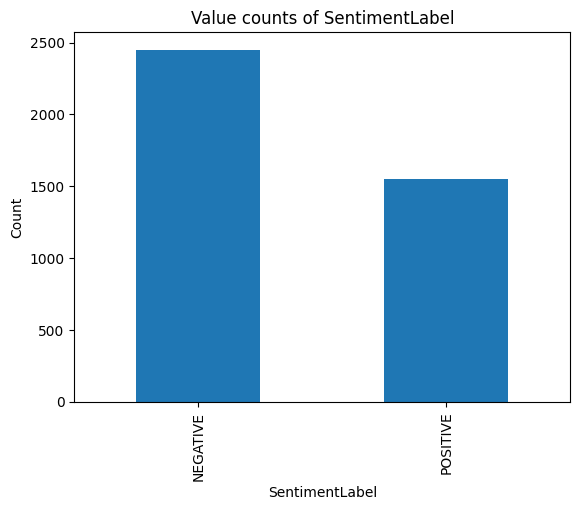

In [ ]:
value_counts = Sentimentdf['SentimentLabel'].value_counts()

# Create a bar chart of the value counts
value_counts.plot.bar()

# Set the title and axis labels
plt.title("Value counts of SentimentLabel")
plt.xlabel("SentimentLabel")
plt.ylabel("Count")

# Show the chart
plt.show()
#Need to make negative, positive even

In [ ]:
import random
import pandas as pd

# Split the DataFrame into positive and negative DataFrames
positive_tweets = Sentimentdf[Sentimentdf['SentimentLabel'] == "NEGATIVE"]
negative_tweets = Sentimentdf[Sentimentdf['SentimentLabel'] == "POSITIVE"]

random_positive_tweets = positive_tweets.sample(n=1000)
random_negative_tweets = negative_tweets.sample(n=1000)

# Combine the randomly selected positive and negative tweets into a single DataFrame
random_tweets = pd.concat([random_positive_tweets, random_negative_tweets])

# Shuffle the rows of the combined DataFrame
random_tweets = random_tweets.sample(frac=1)

# Create a new DataFrame with the random tweets
random_df = pd.DataFrame(random_tweets)

# Save the new DataFrame to a CSV file
random_df.to_csv("sample_sentiment.csv", index=False)

In [ ]:
dfSentiment = pd.read_csv('sample_sentiment.csv')
dfSentiment.head()

,Tweet,Preprocessed,KagglePredictions,SentimentLabel,SentimentScore
0,I WANNA SEE THIS RED HEAD SO BAD! who'd a tho...,wan na see red head bad ! who thought would ne...,NEGATIVE,NEGATIVE,0.999768
1,@Only1M3 aww ok its a rain check for sure..,user www ok rain check sure,NEGATIVE,POSITIVE,0.972252
2,"Oh, and I did pass by Williams st in Atlanta. ...",ohio pass williams st atlanta found locations ...,POSITIVE,NEGATIVE,0.977309
3,Workin' when it's hot outside,working hot outside,NEGATIVE,NEGATIVE,0.955359
4,@MarkCorden probably!,user probably !,POSITIVE,NEGATIVE,0.682543


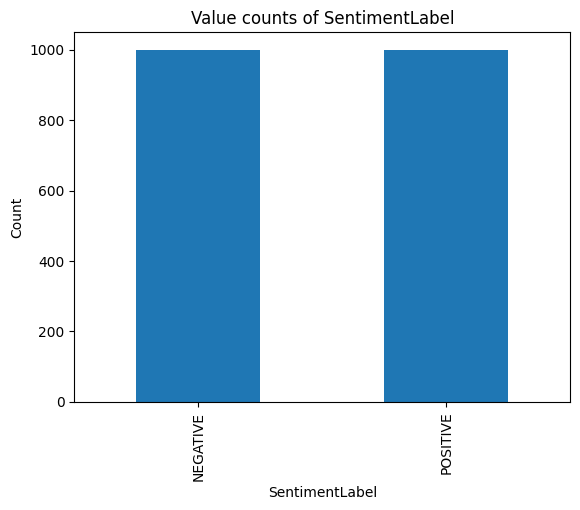

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Get the value counts of the KagglePredictions column
value_counts = dfSentiment['SentimentLabel'].value_counts()

# Create a bar chart of the value counts
value_counts.plot.bar()

# Set the title and axis labels
plt.title("Value counts of SentimentLabel")
plt.xlabel("SentimentLabel")
plt.ylabel("Count")

# Show the chart
plt.show()

In [ ]:
# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(dfSentiment['Tweet'], dfSentiment['SentimentLabel'], test_size=0.3, random_state=42)

# define pipeline
text_clf_nb = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

# fit pipeline on training set
text_clf_nb.fit(X_train, y_train)

# obtain predicted sentiment labels for test set
y_pred = text_clf_nb.predict(X_test)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.7116666666666667


In [ ]:
misclassified = pd.DataFrame({'text': X_test, 'true_label': y_test, 'predicted_label': y_pred})
misclassified = misclassified[misclassified['true_label'] != misclassified['predicted_label']]

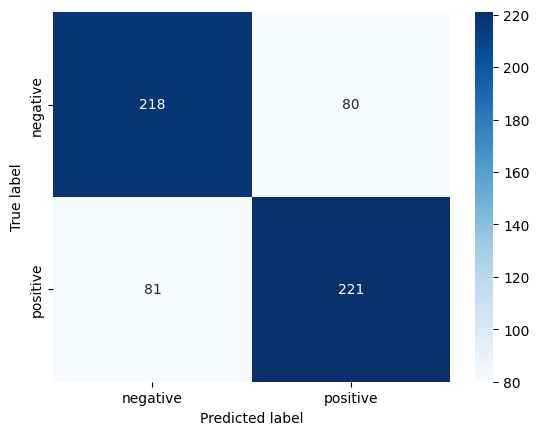

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [ ]:
import random
import pandas as pd

# Split the DataFrame into positive and negative DataFrames
positive_tweets = Sentimentdf[Sentimentdf['KagglePredictions'] == "NEGATIVE"]
negative_tweets = Sentimentdf[Sentimentdf['KagglePredictions'] == "POSITIVE"]

random_positive_tweets = positive_tweets.sample(n=1000)
random_negative_tweets = negative_tweets.sample(n=1000)

# Combine the randomly selected positive and negative tweets into a single DataFrame
random_tweets = pd.concat([random_positive_tweets, random_negative_tweets])

# Shuffle the rows of the combined DataFrame
random_tweets = random_tweets.sample(frac=1)

# Create a new DataFrame with the random tweets
random_df = pd.DataFrame(random_tweets)

# Save the new DataFrame to a CSV file
random_df.to_csv("sample_kaggle.csv", index=False)

In [ ]:
dfkaggle = pd.read_csv('sample_kaggle.csv')
dfkaggle.head()

,Tweet,Preprocessed,KagglePredictions,SentimentLabel,SentimentScore
0,@Elena I'm trying to make a slideshow editor ...,user trying make slideshow editor gon na thoug...,NEGATIVE,NEGATIVE,0.995864
1,just spent 100 quid in one go. Regina Spektor ...,spent 100 uid one go regina sector tickets tho...,POSITIVE,POSITIVE,0.956283
2,@emma_licious na all my good shoes are in the ...,user na good shoes boxes pro wear cup forces w...,POSITIVE,POSITIVE,0.990605
3,Transferring Music onto my Phone... its taking...,transferring music onto phone taking soon loon...,NEGATIVE,NEGATIVE,0.986005
4,@Ashmrx AH NOOO!hell no it must be a rumour!sh...,user ah noon ! hell must rumour ! ship true,NEGATIVE,POSITIVE,0.996164


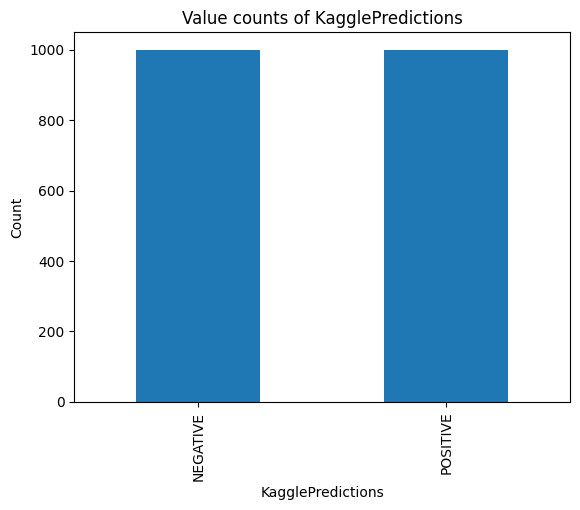

In [ ]:
# Get the value counts of the KagglePredictions column
value_counts = dfkaggle['KagglePredictions'].value_counts()

# Create a bar chart of the value counts
value_counts.plot.bar()

# Set the title and axis labels
plt.title("Value counts of KagglePredictions")
plt.xlabel("KagglePredictions")
plt.ylabel("Count")

# Show the chart
plt.show()

In [ ]:
# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(dfkaggle['Tweet'], dfkaggle['KagglePredictions'], test_size=0.3, random_state=42)

# define pipeline
text_clf_nb = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

# fit pipeline on training set
text_clf_nb.fit(X_train, y_train)

# obtain predicted sentiment labels for test set
y_pred = text_clf_nb.predict(X_test)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.6633333333333333


In [ ]:
misclassified = pd.DataFrame({'text': X_test, 'true_label': y_test, 'predicted_label': y_pred})
misclassified = misclassified[misclassified['true_label'] != misclassified['predicted_label']]

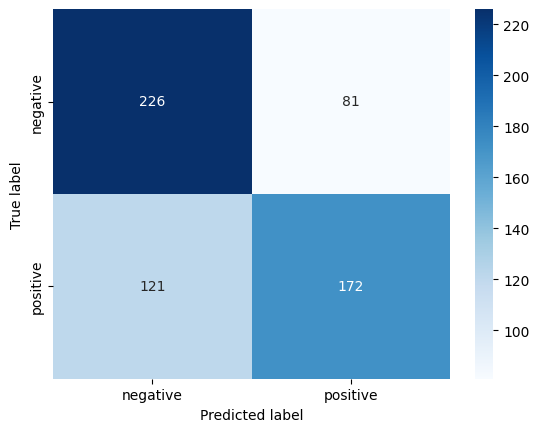

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [ ]:
positive_negative = Sentimentdf[(Sentimentdf['KagglePredictions'] == 'POSITIVE') & (Sentimentdf['SentimentLabel'] == 'NEGATIVE')]
pd.set_option('colheader_justify', 'left')
new_dataset = positive_negative[['KagglePredictions','SentimentLabel', 'Tweet', 'Preprocessed', 'SentimentScore']].copy()
new_dataset.to_csv('positive_negative.csv', index=False)

In [ ]:
data = pd.read_csv("/content/positive_negative.csv")
data.head(5)

,KagglePredictions,SentimentLabel,Tweet,Preprocessed,SentimentScore
0,POSITIVE,NEGATIVE,Who really doubted that Mathematica is the hea...,really doubted mathematics heart core wolframa...,0.995720
1,POSITIVE,NEGATIVE,@blsm79 get with me before you go to bed tonig...,user get go bed tonight,0.971881
2,POSITIVE,NEGATIVE,@charlieisaacs awww Charlie I just saw your tw...,user www charlie saw tweet still expenses afar,0.993056
3,POSITIVE,NEGATIVE,@YouTubeAmelia signing,user signing,0.746073
4,POSITIVE,NEGATIVE,@TamminSursok I wish I was called Emily,user wish called emily,0.986470


In [ ]:
negative_positive = Sentimentdf[(Sentimentdf['KagglePredictions'] == 'NEGATIVE') & (Sentimentdf['SentimentLabel'] == 'POSITIVE')]
pd.set_option('colheader_justify', 'left')
new_dataset = negative_positive[['KagglePredictions', 'SentimentLabel', 'Tweet']].copy()
new_dataset.to_csv('negative_positive.csv', index=False)

In [ ]:
data1 = pd.read_csv("/content/negative_positive.csv")
data1.head(5)

,KagglePredictions,SentimentLabel,Tweet
0,NEGATIVE,POSITIVE,@danigingerkid he was not happy and i wanted t...
1,NEGATIVE,POSITIVE,"@brenda_song u lucky it doesn't get to u, too ..."
2,NEGATIVE,POSITIVE,Train today. No bike for me- incredible backache
3,NEGATIVE,POSITIVE,@DavidArchie i didn't have the chance to watch...
4,NEGATIVE,POSITIVE,people seem to be impressed by Project Natal i...


In [ ]:
Sentimentdf = pd.read_csv('Depression_Sentiments.csv')

# Create an empty list to store rows with SentimentScore < 0.7
low_sentiment_rows = []

# Iterate through each row of the Sentimentdf DataFrame
for index, row in Sentimentdf.iterrows():
    # Check if the SentimentScore is less than 0.7
    if row['SentimentScore'] < 0.7:
        # If it is, append the row to the low_sentiment_rows list
        low_sentiment_rows.append(row)

# Create a new DataFrame from the low_sentiment_rows list
low_sentiment_df = pd.DataFrame(low_sentiment_rows)

# Print the new DataFrame
low_sentiment_df.head()

,Tweet,Preprocessed,KagglePredictions,SentimentLabel,SentimentScore
20,@warrenwhitlock hello! was &amp; still may be ...,user hello ! amp still may going vegas week en...,NEGATIVE,NEGATIVE,0.554694
69,@mileycyrus what are you nominated for? Best m...,user nominated ? best movie ?,POSITIVE,POSITIVE,0.594046
75,@BenLabi ya know it http://twitpic.com/4hgoo,user ya know link,POSITIVE,POSITIVE,0.562240
90,Still trying to get back in the swing of thing...,still trying get back swing things really like...,NEGATIVE,NEGATIVE,0.516783
107,So glad Amber is worse than I am at cards,glad amber worse cards,POSITIVE,NEGATIVE,0.627615


In [ ]:
positive_tweets = dfSentiment[dfSentiment['SentimentLabel'] == 'POSITIVE']['Tweet']
negative_tweets = dfSentiment[dfSentiment['SentimentLabel'] == 'NEGATIVE']['Tweet']

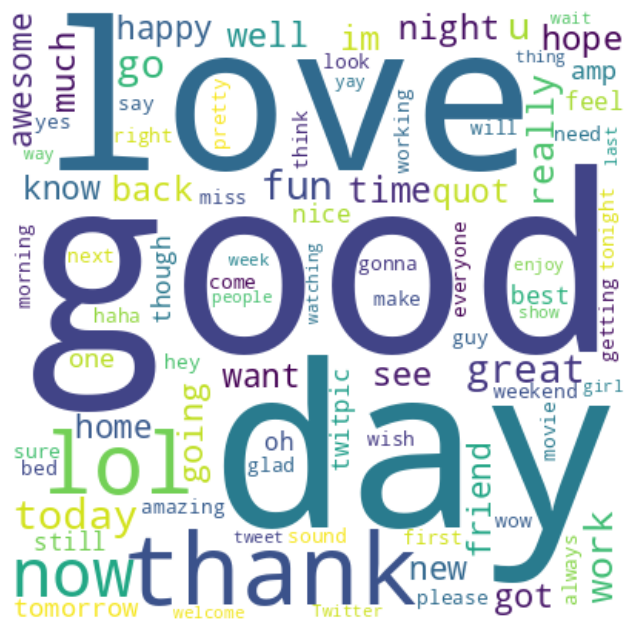

In [ ]:
from wordcloud import WordCloud

#Wordcloud for positive tweets
wordcloud = WordCloud(width=400, height=400, background_color='white', min_font_size=10).generate(' '.join(positive_tweets))
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

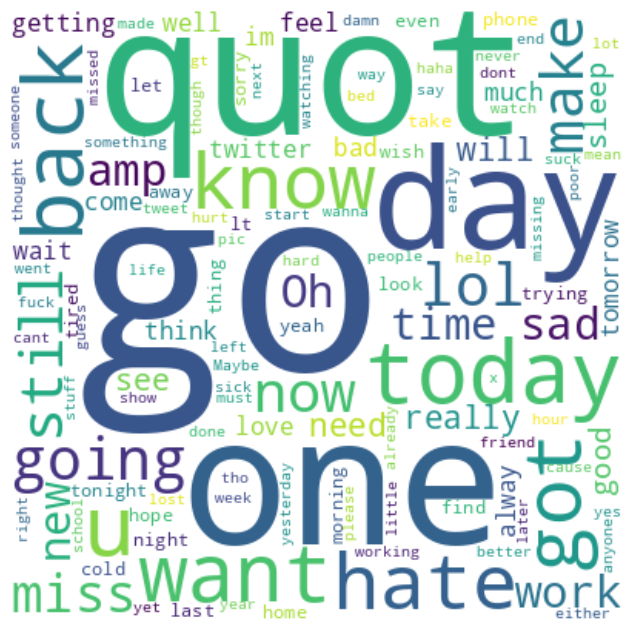

In [ ]:
# Word cloud for negative tweets
wordcloud = WordCloud(width=400, height=400, background_color='white', min_font_size=10).generate(' '.join(negative_tweets))
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

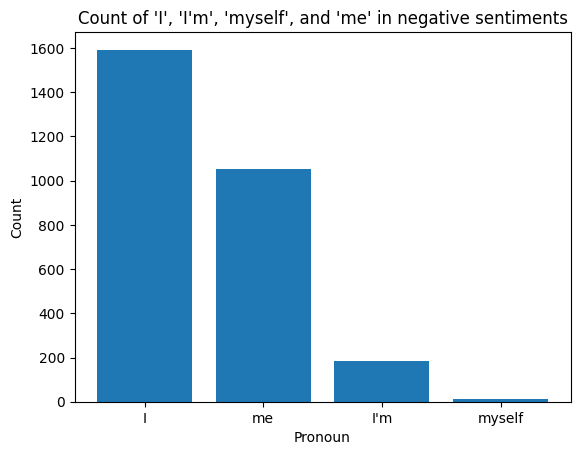

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Initialize variables to store the counts
negative_I_count = 0
negative_Im_count = 0
negative_myself_count = 0
negative_me_count = 0

# Loop through each row in the dataset
for index, row in Sentimentdf.iterrows():
    # Check if the SentimentLabel for this row is "NEGATIVE"
    if row["SentimentLabel"] == "NEGATIVE":
        # Count the number of times "I'm" and "I" appear in the text of this row
        row_I_count = row["Tweet"].count("I")
        row_Im_count = row["Tweet"].count("I'm")
        row_myself_count = row["Tweet"].count("myself")
        row_me_count = row["Tweet"].count("me")

        # Add the row counts to the total counts for negative rows
        negative_I_count += row_I_count
        negative_Im_count += row_Im_count
        negative_myself_count += row_myself_count
        negative_me_count += row_me_count

# Create a list of tuples containing the labels and counts
counts = [negative_I_count, negative_Im_count, negative_myself_count, negative_me_count]
labels = ["I", "I'm", "myself", "me"]
data = list(zip(labels, counts))

# Sort the list of tuples based on the count in descending order
sorted_data = sorted(data, key=lambda x: x[1], reverse=True)

# Extract the sorted labels and counts from the sorted list of tuples
sorted_labels = [t[0] for t in sorted_data]
sorted_counts = [t[1] for t in sorted_data]

# Create a bar chart showing the counts
fig, ax = plt.subplots()
ax.bar(sorted_labels, sorted_counts)
ax.set_xlabel("Pronoun")
ax.set_ylabel("Count")
ax.set_title("Count of 'I', 'I'm', 'myself', and 'me' in negative sentiments")
plt.show()


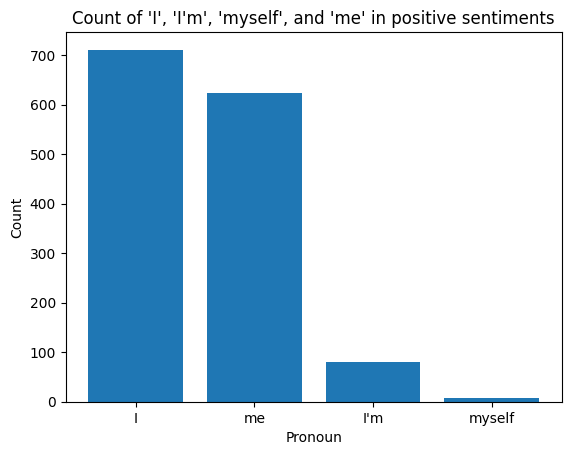

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Initialize variables to store the counts
positive_I_count = 0
positive_Im_count = 0
positive_myself_count = 0
positive_me_count = 0

# Loop through each row in the dataset
for index, row in Sentimentdf.iterrows():
    # Check if the SentimentLabel for this row is "POSITIVE"
    if row["SentimentLabel"] == "POSITIVE":
        # Count the number of times "I'm" and "I" appear in the text of this row
        row_I_count = row["Tweet"].count("I")
        row_Im_count = row["Tweet"].count("I'm")
        row_myself_count = row["Tweet"].count("myself")
        row_me_count = row["Tweet"].count("me")

        # Add the row counts to the total counts for positive rows
        positive_I_count += row_I_count
        positive_Im_count += row_Im_count
        positive_myself_count += row_myself_count
        positive_me_count += row_me_count

# Create a list of tuples containing the labels and counts
counts = [positive_I_count, positive_Im_count, positive_myself_count, positive_me_count]
labels = ["I", "I'm", "myself", "me"]
data = list(zip(labels, counts))

# Sort the list of tuples based on the count in descending order
sorted_data = sorted(data, key=lambda x: x[1], reverse=True)

# Extract the sorted labels and counts from the sorted list of tuples
sorted_labels = [t[0] for t in sorted_data]
sorted_counts = [t[1] for t in sorted_data]

# Create a bar chart showing the counts
fig, ax = plt.subplots()
ax.bar(sorted_labels, sorted_counts)
ax.set_xlabel("Pronoun")
ax.set_ylabel("Count")
ax.set_title("Count of 'I', 'I'm', 'myself', and 'me' in positive sentiments")
plt.show()
